In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Contour

Contour được định nghĩa là đường cong nối các điểm có cùng màu, độ sáng nằm liên tục nhau trên đường biên của vật thể. 
* Sử dụng trên ảnh trắng/đen (binary)
* Với OpenCV bài toán tìm contour bằng bài toán tìm kiếm **vật thể trắng** trong **nền đen**

Sử dụng hàm `findContours` trong OpenCV để tìm contours (đường viền)
* Tham số đầu tiên cần truyền là ma trận bức ảnh cần tìm viền
* Tham số thứ hai để phương thức mặc định là `RETR_TREE`, cách thức duyệt các contours theo thứ tự các level
* Tham số thứ ba là phương thức OpenCV lưu trữ contours, ví dụ `CHAIN_APPROX_NONE` lưu tất cả các điểm còn `CHAIN_APPROX_SIMPLE` chỉ lưu các điểm đầu mút của các đoạn thẳng trên đường viền

Sử dụng hàm `drawContours` trong OpenCV để vẽ các contours

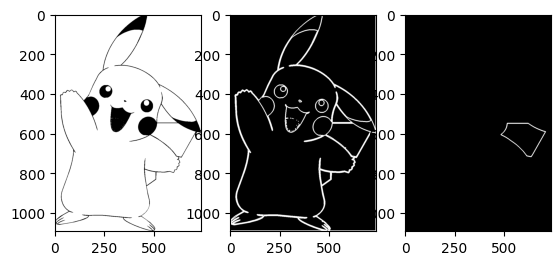

In [2]:
img = cv.imread('images/pikachu.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # chuyển ảnh thành gray scale
ret, img_bw = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU+cv.THRESH_BINARY) # chuyển thành ảnh binary trắng đen

contours, hierarchy = cv.findContours(img_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # tìm contours trong ảnh trắng đen

img_black1 = np.zeros_like(img_bw) # tạo nền đen để vẽ contours
cv.drawContours(img_black1, contours, -1, 255, 3)  # vẽ tất cả contours với màu trắng (255), độ dày (3)
img_black2 = np.zeros_like(img_bw) # tạo nền đen để vẽ contours
cv.drawContours(img_black2, contours, 2, 255, 3)  # vẽ contours thứ ba bằng màu trắng (255), độ dày (3)

plt.subplot(1, 3, 1)
plt.imshow(img_bw, cmap='gray', vmin=0, vmax=255)


plt.subplot(1, 3, 2)
plt.imshow(img_black1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.imshow(img_black2, cmap='gray', vmin=0, vmax=255)

## Contour features

* **Moments** - Xác định moments của đường bao bằng hàm `moments`
* **Area** - Xác định diện tích của đường bao bằng hàm `contourArea` hoặc từ moments `M['m00']`
* **Perimeter** - Xác định độ dài của đường viền bằng hàm `arcLength`
* **Convex hull** - Xác định bao lồi của đường viền bằng hàm `convexHull`
* **Bounding rectangle** - Xác định một hình chữ nhật có cạnh song song với trục bao vật thể bằng hàm `boundingRect`

{'m00': 21259.5, 'm10': 12766971.166666666, 'm01': 13128243.166666666, 'm20': 7717047928.25, 'm11': 7895108333.541666, 'm02': 8139619331.916666, 'm30': 4694083511909.351, 'm21': 4778436802897.217, 'm12': 4902033690130.783, 'm03': 5067198240977.15, 'mu20': 50096552.606264114, 'mu11': 11202222.023426056, 'mu02': 32619231.108555794, 'mu30': -405581300.7265625, 'mu21': -477029603.00990677, 'mu12': 111429132.93637085, 'mu03': 504844175.3203125, 'nu20': 0.11084133517233558, 'nu11': 0.024785522783023345, 'nu02': 0.07217181503054594, 'nu30': -0.006154535884898946, 'nu21': -0.007238735623718785, 'nu12': 0.001690893036862227, 'nu03': 0.007660810761553899}
Area = 21259.50000
Area = 21259.50000
Perimeter = 640.13917


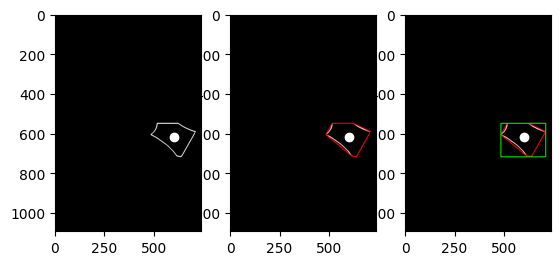

In [3]:
img = cv.imread('images/pikachu.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # chuyển ảnh thành gray scale
ret, img_bw = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU+cv.THRESH_BINARY) # chuyển thành ảnh binary trắng đen

contours, hierarchy = cv.findContours(img_bw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # tìm contours trong ảnh trắng đen

cntr = contours[2]
M = cv.moments(cntr) # xác định moments của đường bao thứ 3

print(M)

# Tính diện tích
print(f"Area = {cv.contourArea(cntr):.5f}")
print(f"Area = {M['m00']:.5f}") # hai cách tính ra kết quả như nhau

# Tính độ dài
print(f"Perimeter = {cv.arcLength(cntr, True):.5f}") # do đây là đường bao đóng nên tham số truyền thứ hai là True

# tính centroid của đường viền thứ 3
cx = int(M['m10']/M['m00']) 
cy = int(M['m01']/M['m00'])

# xác định bao lồi
hull = cv.convexHull(cntr)

# xác định hình chữ nhật bao
x, y, w, h = cv.boundingRect(cntr)

img_black = np.zeros_like(img) # tạo nền đen để vẽ contours
cv.drawContours(img_black, [cntr], 0, (255, 255, 255), 3)  # vẽ contours thứ ba bằng màu trắng (255), độ dày (3)

plt.subplot(1, 3, 1)
plt.imshow(img_black)
plt.scatter([cx], [cy], c='white')

cv.drawContours(img_black, [hull], 0, (255,0,0), 3)  # vẽ bao lồi bằng màu đỏ, độ dày (3)

plt.subplot(1, 3, 2)
plt.imshow(img_black)
plt.scatter([cx], [cy], c='white')

cv.rectangle(img_black, (x, y), (x+w, y+h), (0, 255, 0), 3) # vẽ bounding rectangle bằng màu xanh, độ dày (3)

plt.subplot(1, 3, 3)
plt.imshow(img_black)
plt.scatter([cx], [cy], c='white')